<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://media.istockphoto.com/vectors/abstract-seamless-background-of-black-and-white-parallel-vertical-vector-id977716226?k=20&m=977716226&s=170667a&w=0&h=GdlnP-NwB13Db8cm_tRhIgFoTh21cK7LZ3RzW6hPGWo=", # vertical lines
       "https://b4x7y4f4.rocketcdn.me/wp-content/uploads/patterns3/C0367.jpg", # horizontal lines
        "https://t3.ftcdn.net/jpg/01/27/35/60/360_F_127356042_vzOQwogmN7MtYpbRN0jKWuxit5Tjp7lb.jpg",
        "https://img.freepik.com/free-photo/blue-white-line-pattern_1339-600.jpg",
      "https://placekitten.com/800/571",
      "https://media.istockphoto.com/vectors/pattern-with-dotted-circle-graphic-texture-with-randomly-disposed-vector-id513999980?k=20&m=513999980&s=612x612&w=0&h=NBIB519UDjdYIG7xtK8g9D4BsnuaSA0A3FdZupnBHUY="]

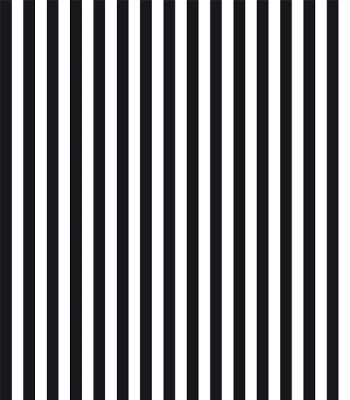

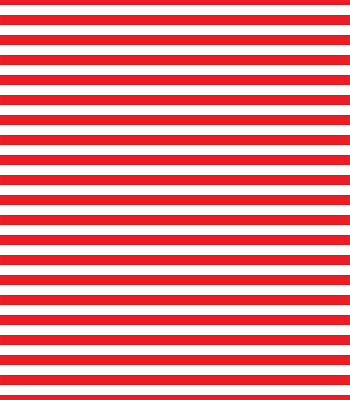

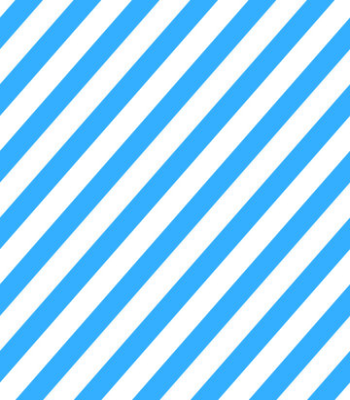

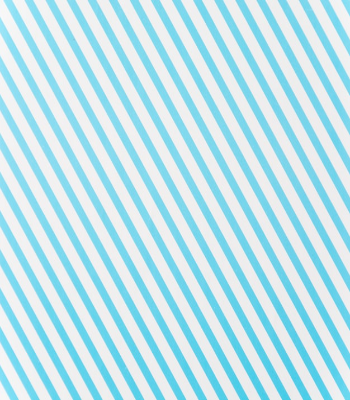

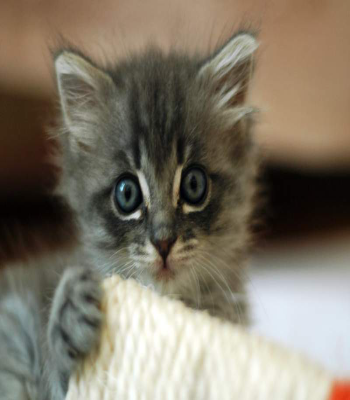

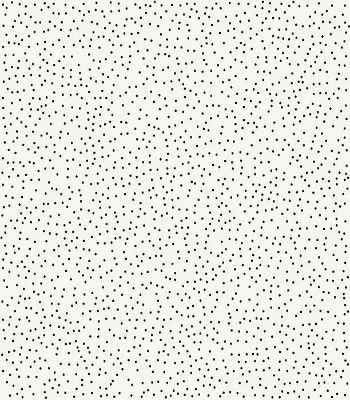

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (350, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
gray_images = []
def grayscale(images):
  for i in images:
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray)

In [ ]:
grayscale(images)

In [ ]:
Lh = gray_images[0]
Lv = gray_images[1]
Ldp = gray_images[2]
Ldn = gray_images[3]
A = gray_images[4]
D = gray_images[5]

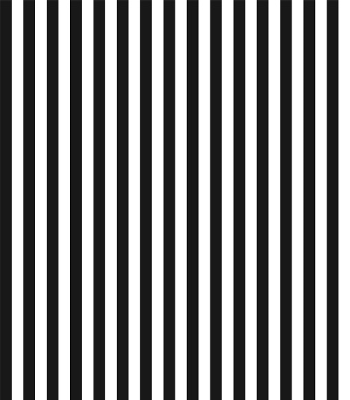

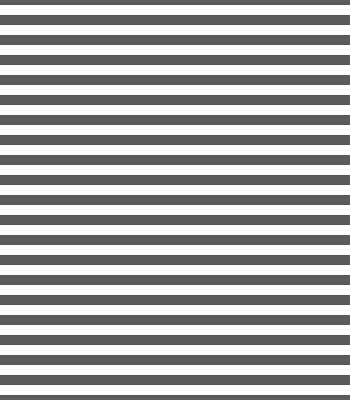

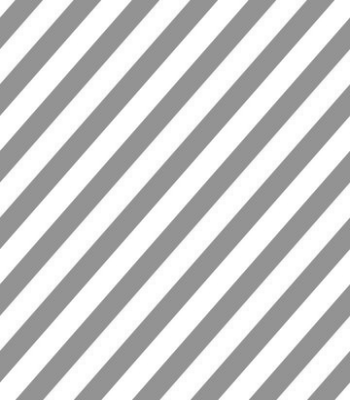

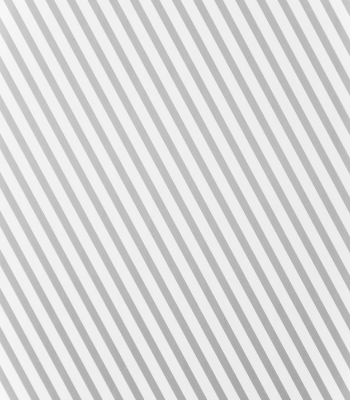

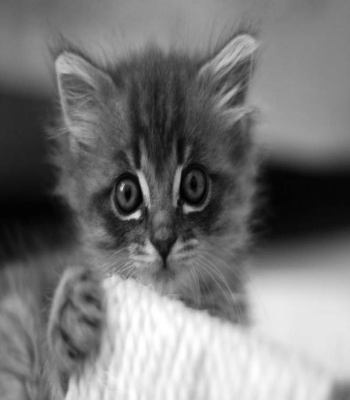

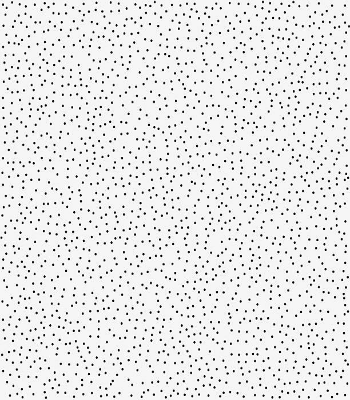

In [ ]:
cv2_imshow(Lh)
cv2_imshow(Lv)
cv2_imshow(Ldp)
cv2_imshow(Ldn)
cv2_imshow(A)
cv2_imshow(D)

# 1. Detect the presence of a point in an image Ag

In [ ]:
kernel_p = np.array([[-1,-1,-1], [-1, 8, -1], [-1,-1,-1]])

In [ ]:
def point_detection(image):
  image = image.astype(np.float64)
  image_2 = image.copy()

  shape = image.shape
  image_3 = np.zeros(shape)
  R = shape[0]
  C = shape[1]

  for i in range(1,R-1):
    for j in range(1,C-1):
      a = np.array([[image[i-1][j-1] , image[i+1][j-1] , image[i-1][j+1]] , [image[i+1][j+1] , image[i][j-1] , image[i][j+1]] , [image[i-1][j] , image[i+1][j] ,image[i][j]]])

      # Finding the value obtained after applying the kernel and storing it in s
      s = np.sum(a*kernel_p)

      # Let image_3 be a image that highlights all the points were s value is zero
      if(s == 0):
        image_3[i][j] = 255

      image_2[i][j] = s

  cv2_imshow(image_2)
  cv2_imshow(image_3)


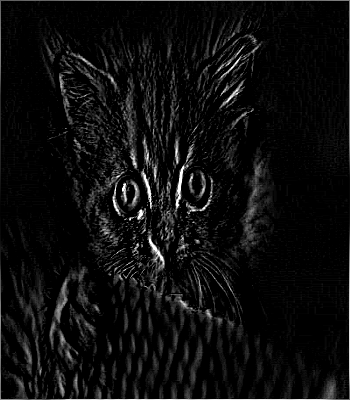

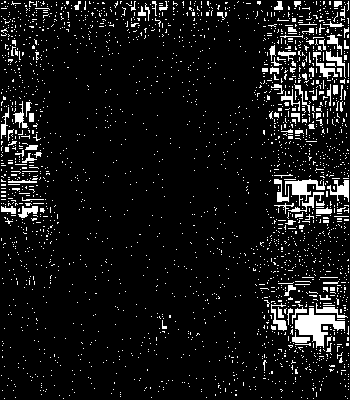

In [ ]:
point_detection(A)

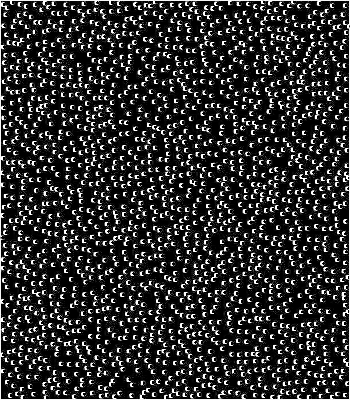

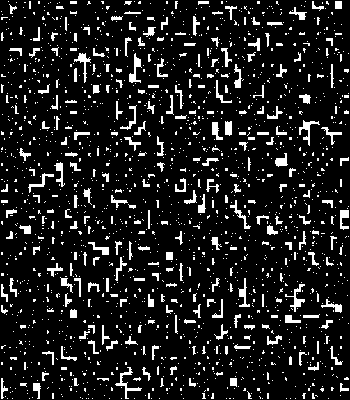

In [ ]:
point_detection(D)

# 2. Store the spatial location of the point in that image

The spatial location data is stored in image_2.

# 3. Detect the presence of line in the image Lhg


In [ ]:
kernel_h = np.array([[-1,-1,-1], [2, 2, 2], [-1,-1,-1]])

In [ ]:
a = np.array([1,1,1,1,1,1,1,1,1])

In [ ]:
np.sum(a*kernel_h)

ValueError: ignored

In [ ]:
kernel_v = np.array([[-1,2,-1], [-1,2,-1], [-1,2,-1]])

In [ ]:
kernel_dp = np.array([[-1,-1,2], [-1,2,-1], [2,-1,-1]])

In [ ]:
kernel_dn = np.array([[2,-1,-1], [-1,2,-1], [-1,-1,2]])

In [ ]:
kernels = np.array([kernel_h,kernel_h,kernel_h,kernel_h])

In [ ]:
def line_detection(image):
  image = image.astype(np.float64)
  image_2 = image.copy()
  shape = image.shape
  R = shape[0]
  C = shape[1]

  for i in range(1,R-1):
    for j in range(1,C-1):
      a = np.array([[image[i-1][j-1] , image[i+1][j-1] , image[i-1][j+1]] , [image[i+1][j+1] , image[i][j-1] , image[i][j+1]] , [image[i-1][j] , image[i+1][j] ,image[i][j]]])

      # Finding the value obtained after applying all four kernels
      vals = []
      for k in kernels: # H, V, DP, DN
        s = np.sum(a*k)
        vals.append(s)

      # Finding the max value of all kernels
      max1 = (max(vals))
      image_2[i][j] = max1

  cv2_imshow(image_2)


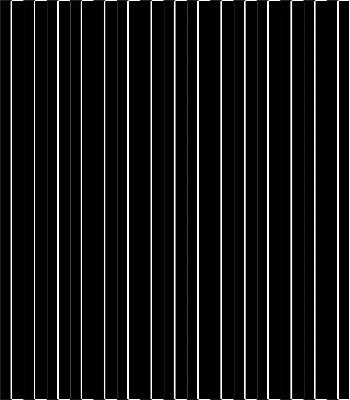

In [ ]:
line_detection(Lh)

# 4. Store the spatial location of the point in that image

The spatial location data is stored in image_2.

# 5. Detect the presence of line in the image Lvg

In [ ]:
line_detection(Lv)

# 6. Store the spatial location of the point in that image
The spatial location data is stored in image_2.

# 7. Detect the presence of line in the image Ldpg

In [ ]:
line_detection(Ldp)

#8. Store the spatial location of the point in that image
The spatial location data is stored in image_2.

# 9. Detect the presence of line in the image Ldng

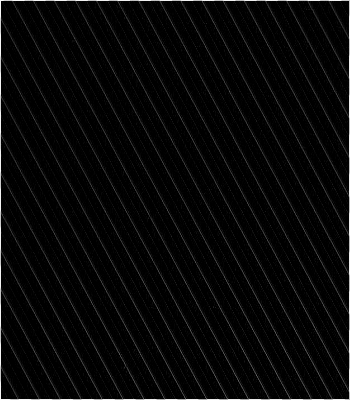

In [ ]:
line_detection(Ldn)

#10. Store the spatial location of the point in that image
The spatial location data is stored in image_2.